## Математические методы биоинформатики

### Home work 1. Описательная статистика в Python

### Задание.

Загрузите из файла *heart.csv* данные о сердечных заболеваниях.

Признаки (переменные):  
- age  
- sex (1 - Male, 0 - Female)  
- cp - chest pain type (4 values)  
- trestbps - resting blood pressure
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl
- restecg - resting electrocardiographic results (values 0,1,2)
- thalach - maximum heart rate achieved
- exang - exercise induced angina
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 0 = normal; 1 = fixed defect; 2 = reversable defect

Удалите из датафрейма столбец target и в дальнейшем анализируйте датафрейм без него.

**Ответьте на следующие вопросы и выподните следующие задания:**  

1) Сколько образцов (объектов) содержит данный датасет?  

2) Сколько атрибутов (признаков) содержит данный датасет?  

3) Опишите тип каждого признака: числовой (дискретный/непрерывный), категориальный (номинальный/бинарный/ординальный).

4) Вычислите сколько мужчин/женщин в датасете?  

5) Вычислите описательные статистики для количественных признаков (среднее значение, медиана, мода (только для дискретных переменных), размах, дисперсия, среднеквадратичное отклонение, 1й/2й/3й квартили, межквартильный размах) с помощью numpy или statistics. Создайте единую функцию, которая вычислит все эти значения.

6) Для категориальных признаков определите возможные категории и число объектов, принадлежащих к каждой категории. Для каждого признака постройте соответствующую столбчатую диаграмму. Подпишите оси.

7) Постройте гистограммы для признаков age, trestbps, chol, thalach, oldpeak. Расположите подграфики для гистограмм в одну линию. Подпишите оси каждой гистограммы. Гистограммы должны быть разных цветов.

8) Постройте "ящики с усами" для признаков age, trestbps, chol, thalach, oldpeak. Подпишите оси.

9) Постройте на одном графике две кривые PDF (probability density function) для признака chol. Одна PDF для мужчин, другая - для женщин. Подпишите оси, добавьте легенду.  

10) Сгруппируйте данные по полу и вычислите для каждой группы среднее значение признака chol, применив к датафрейму функцию аггрегации. Изобразите результаты в виде столбчатой диаграммы, где столбцы должены соответствовать полу, а высота столбцов -  ссоответствующим средним значениям признака chol. Добавьте к каждому столбцу планку погрешности, отражающую среднеквадратичное отклонение.  

11) Сделайте различные выводы относительно рассматриваемого датасета.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

url = 'https://github.com/mortolik/bioinfo4/raw/main/heart.csv'
df = pd.read_csv(url)

if 'target' in df.columns:
    df = df.drop(columns=['target'])

print("Data loaded successfully.")
print(df.head())

Data loaded successfully.
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [11]:
# 1) Сколько образцов (объектов) содержит данный датасет?
num_samples = df.shape[0]
print(f"Количество образцов: {num_samples}")

# 2) Сколько атрибутов (признаков) содержит данный датасет?
num_attributes = df.shape[1]
print(f"Количество атрибутов: {num_attributes}")

Количество образцов: 303
Количество атрибутов: 13


### 3) Опишите тип каждого признака:

- **age**: Числовой (дискретный, так как в годах), но может рассматриваться как непрерывный.
- **sex**: Категориальный (бинарный/номинальный).
- **cp**: Категориальный (номинальный).
- **trestbps**: Числовой (непрерывный).
- **chol**: Числовой (непрерывный).
- **fbs**: Категориальный (бинарный).
- **restecg**: Категориальный (номинальный).
- **thalach**: Числовой (непрерывный).
- **exang**: Категориальный (бинарный).
- **oldpeak**: Числовой (непрерывный).
- **slope**: Категориальный (ординальный/номинальный).
- **ca**: Числовой (дискретный) или Категориальный (ординальный).
- **thal**: Категориальный (номинальный).

In [12]:
# 4) Вычислите сколько мужчин/женщин в датасете?
gender_counts = df['sex'].value_counts()
print("Распределение по полу (1 - Male, 0 - Female):")
print(gender_counts)

Распределение по полу (1 - Male, 0 - Female):
sex
1    207
0     96
Name: count, dtype: int64


In [13]:
# 5) Описательные статистики для количественных признаков
def calculate_descriptive_stats(data):
    stats_dict = {}

    # Selecting numerical columns.
    # Based on types from Q3 description, these are good candidates:
    # age, trestbps, chol, thalach, oldpeak
    numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    for col in numerical_cols:
        series = data[col]

        mean_val = np.mean(series)
        median_val = np.median(series)

        # Statistics mode is robust for discrete data mostly
        try:
            mode_result = stats.mode(series, keepdims=True)
            mode_val = mode_result.mode[0]
        except:
            mode_val = np.nan

        range_val = np.ptp(series)
        variance_val = np.var(series, ddof=1) # Sample variance
        std_dev = np.std(series, ddof=1) # Sample std dev

        q1 = np.percentile(series, 25)
        q2 = np.percentile(series, 50)
        q3 = np.percentile(series, 75)
        iqr = q3 - q1

        stats_dict[col] = {
            'Mean': mean_val,
            'Median': median_val,
            'Mode': mode_val,
            'Range': range_val,
            'Variance': variance_val,
            'Std Dev': std_dev,
            'Q1': q1,
            'Q2': q2,
            'Q3': q3,
            'IQR': iqr
        }

    return pd.DataFrame(stats_dict)

stats_df = calculate_descriptive_stats(df)
print(stats_df)

                age    trestbps         chol     thalach   oldpeak
Mean      54.366337  131.623762   246.264026  149.646865  1.039604
Median    55.000000  130.000000   240.000000  153.000000  0.800000
Mode      58.000000  120.000000   197.000000  162.000000  0.000000
Range     48.000000  106.000000   438.000000  131.000000  6.200000
Variance  82.484558  307.586453  2686.426748  524.646406  1.348095
Std Dev    9.082101   17.538143    51.830751   22.905161  1.161075
Q1        47.500000  120.000000   211.000000  133.500000  0.000000
Q2        55.000000  130.000000   240.000000  153.000000  0.800000
Q3        61.000000  140.000000   274.500000  166.000000  1.600000
IQR       13.500000   20.000000    63.500000   32.500000  1.600000



Признак: sex
sex
0     96
1    207
Name: count, dtype: int64


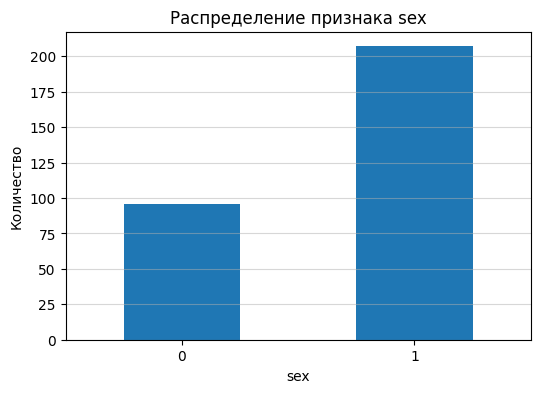


Признак: cp
cp
0    143
1     50
2     87
3     23
Name: count, dtype: int64


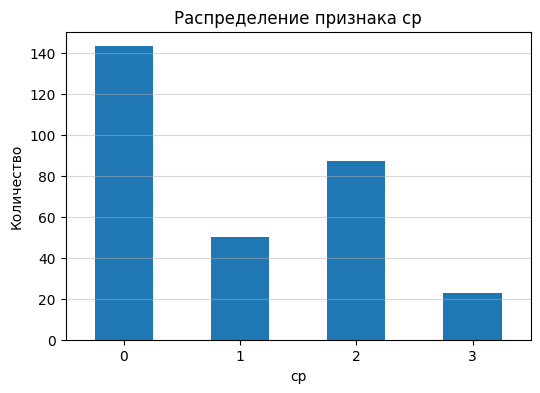


Признак: fbs
fbs
0    258
1     45
Name: count, dtype: int64


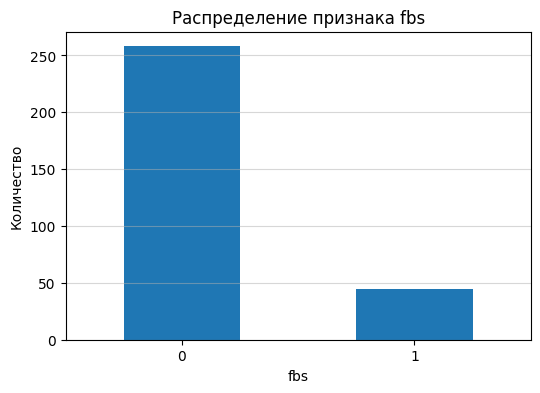


Признак: restecg
restecg
0    147
1    152
2      4
Name: count, dtype: int64


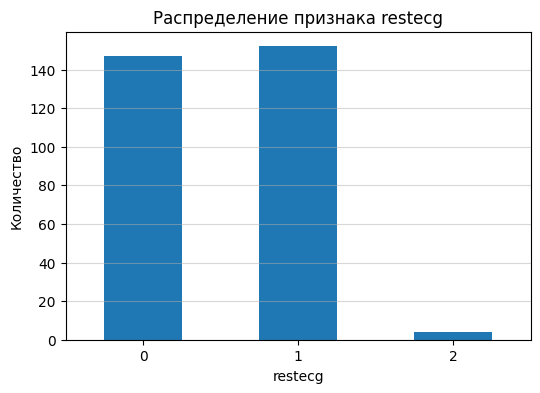


Признак: exang
exang
0    204
1     99
Name: count, dtype: int64


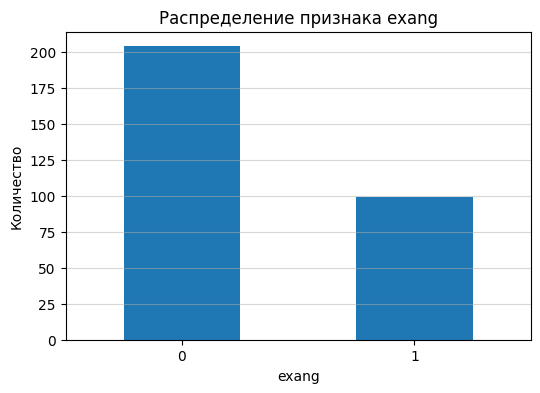


Признак: slope
slope
0     21
1    140
2    142
Name: count, dtype: int64


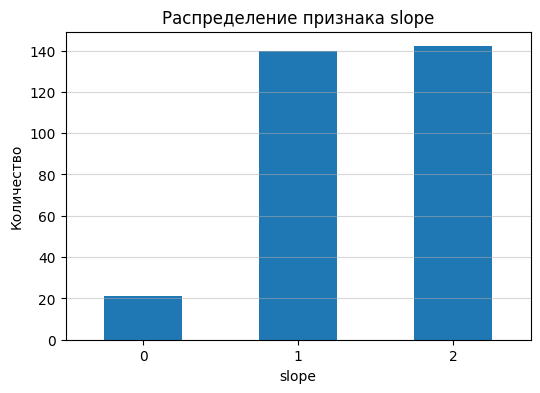


Признак: ca
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


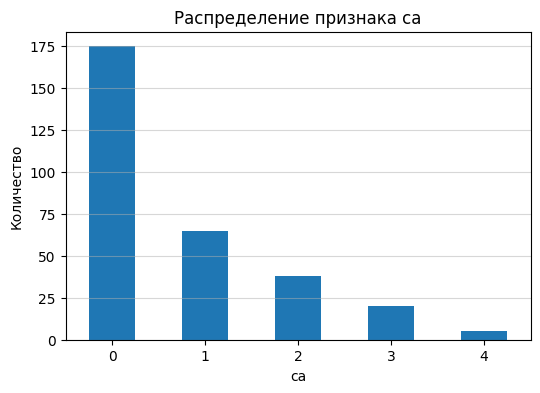


Признак: thal
thal
0      2
1     18
2    166
3    117
Name: count, dtype: int64


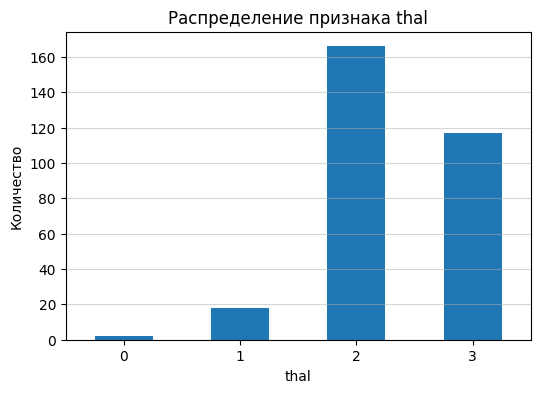

In [14]:
# 6) Анализ категориальных признаков и построение диаграмм
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_cols:
    counts = df[col].value_counts().sort_index()
    print(f"\nПризнак: {col}")
    print(counts)

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar')
    plt.title(f'Распределение признака {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

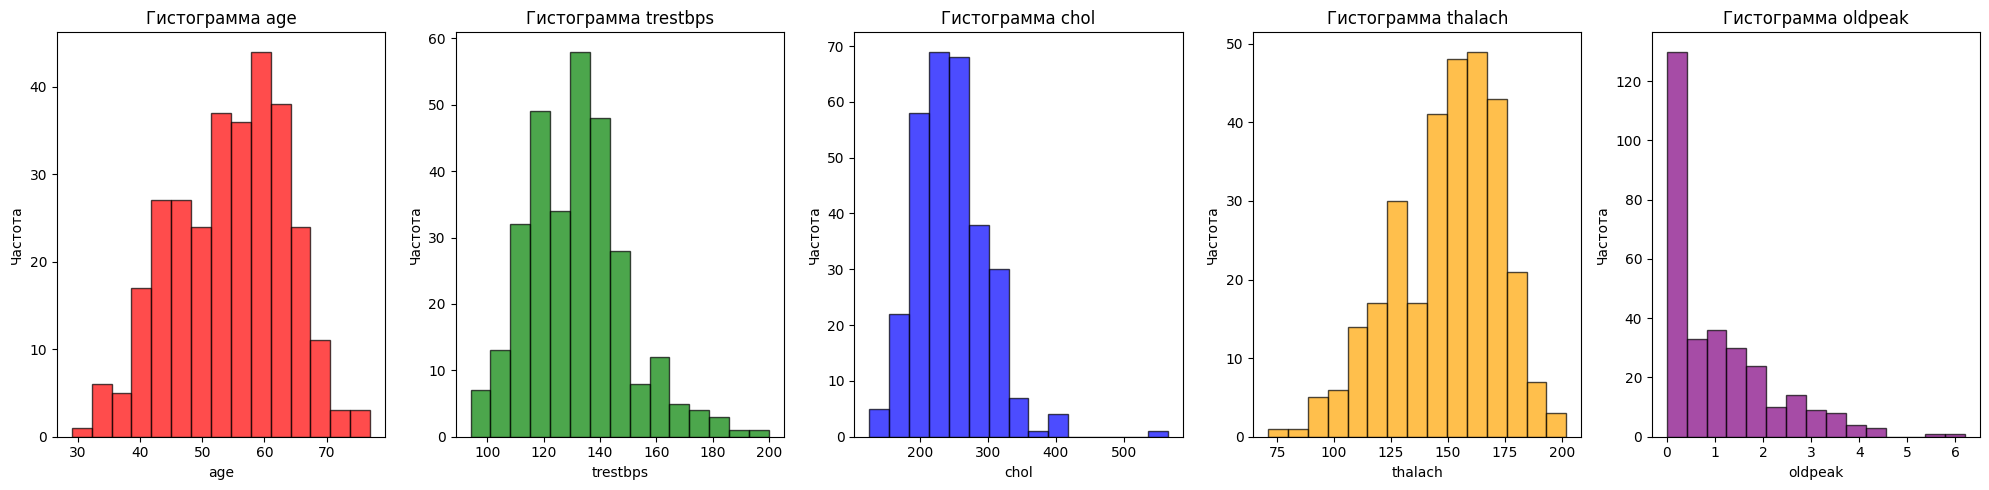

In [15]:
# 7) Гистограммы для признаков age, trestbps, chol, thalach, oldpeak
features_hist = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
colors = ['red', 'green', 'blue', 'orange', 'purple']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, col in enumerate(features_hist):
    axes[i].hist(df[col], bins=15, color=colors[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

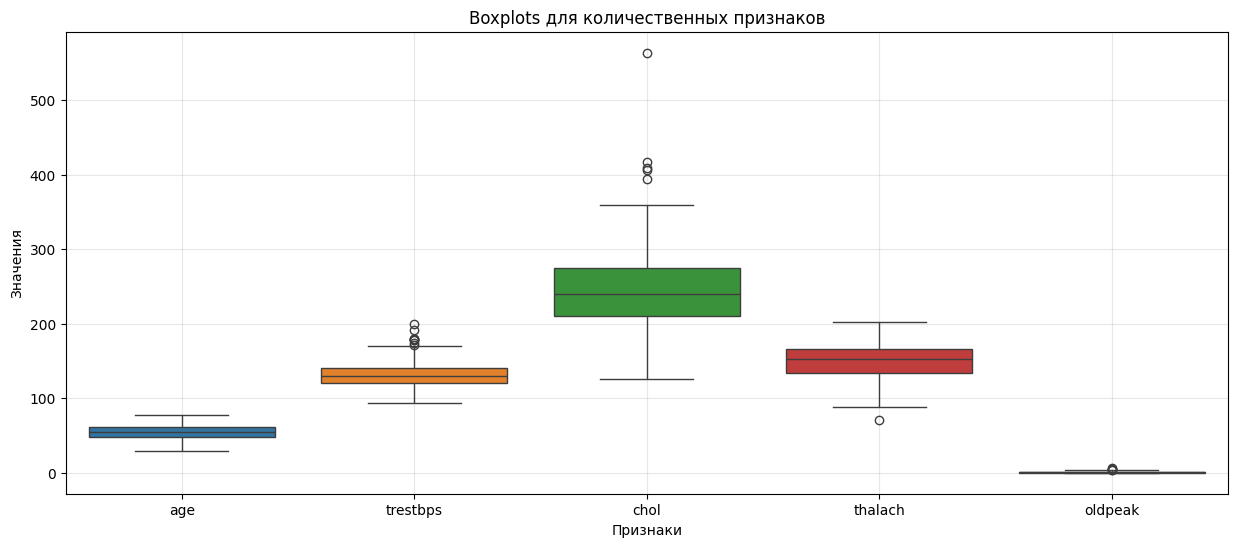

In [7]:
# 8) "Ящики с усами" (Boxplots)
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[features_hist])
plt.title('Boxplots для количественных признаков')
plt.xlabel('Признаки')
plt.ylabel('Значения')
plt.grid(True, alpha=0.3)
plt.show()

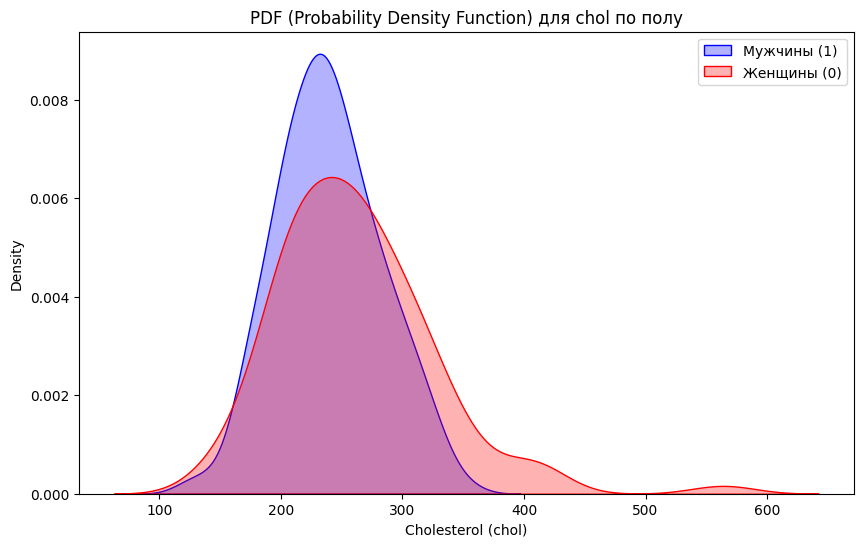

In [8]:
# 9) PDF для chol (мужчины и женщины)
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['sex'] == 1]['chol'], label='Мужчины (1)', fill=True, color='blue', alpha=0.3)
sns.kdeplot(df[df['sex'] == 0]['chol'], label='Женщины (0)', fill=True, color='red', alpha=0.3)

plt.title('PDF (Probability Density Function) для chol по полу')
plt.xlabel('Cholesterol (chol)')
plt.ylabel('Density')
plt.legend()
plt.show()

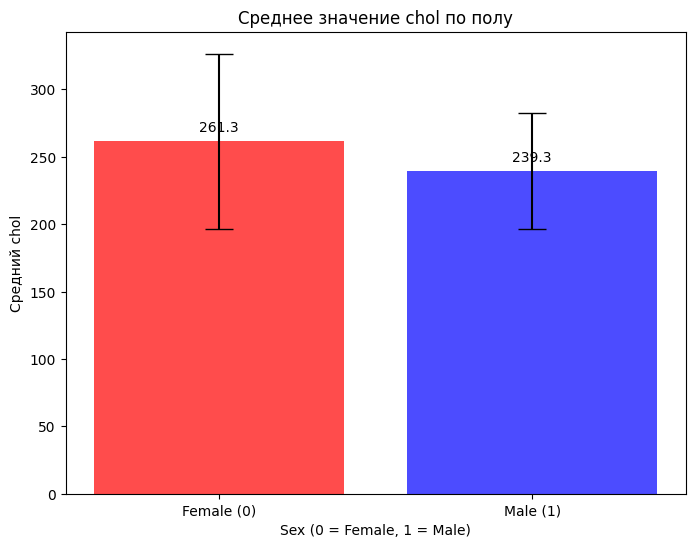

In [9]:
# 10) Столбчатая диаграмма среднего chol по полу с планкой погрешности
grouped_chol = df.groupby('sex')['chol'].agg(['mean', 'std'])

plt.figure(figsize=(8, 6))
bars = plt.bar(grouped_chol.index, grouped_chol['mean'], yerr=grouped_chol['std'],
               capsize=10, color=['red', 'blue'], alpha=0.7)

plt.title('Среднее значение chol по полу')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Средний chol')
plt.xticks([0, 1], ['Female (0)', 'Male (1)'])

# Добавление значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height:.1f}', ha='center', va='bottom')

plt.show()

### 11) Выводы

- Датасет содержит информацию о 303 пациентах с 13 признаками (после удаления целевой переменной).
- Среди пациентов больше мужчин (sex=1).
- Распределение возраста близко к нормальному, но есть сдвиг в сторону старшего возраста.
- Уровень холестерина имеет несколько выбросов в большую сторону (видно на boxplot).
- На графике PDF уровня холестерина видны различия в распределениях между мужчинами и женщинами.
- Средний уровень холестерина у женщин выше, чем у мужчин (согласно пункту 10), однако разброс значений также велик.